In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from matplotlib.ticker import FuncFormatter


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills) 

df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US.dropna(subset=['salary_year_avg'])


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


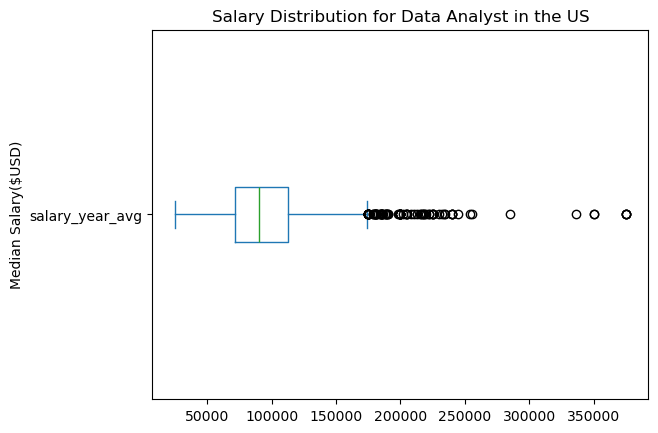

In [8]:
df_DA_US['salary_year_avg'].plot(kind= 'box', vert= False)
plt.title('Salary Distribution for Data Analyst in the US')
plt.ylabel('Median Salary($USD)')
plt.show()

# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure


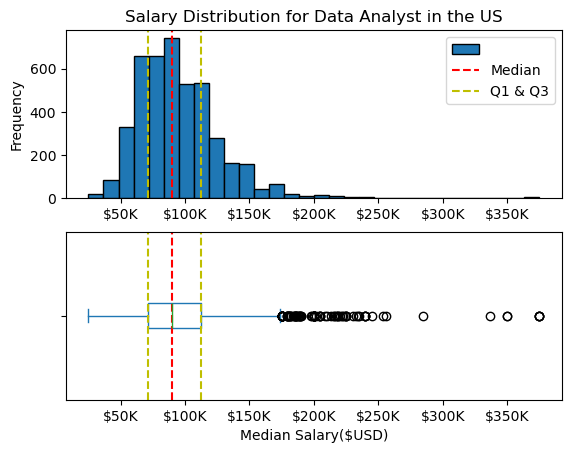

In [9]:
fig, ax = plt.subplots(2,1)
df_DA_US['salary_year_avg'].plot(kind = 'hist', ax= ax[0], bins= 30, edgecolor= 'black')
ax[0].set_title('Salary Distribution for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))

#lines

ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle = '--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color= 'y', linestyle = '--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color= 'y', linestyle = '--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind = 'box', ax= ax[1], vert= False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))

#lines

ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle = '--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color= 'y', linestyle = '--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color= 'y', linestyle = '--')
plt.show()


#Example 2 We'll create 3 boxplots for Data Analyst, Data Engineer, and Data Scientist job salaries in the United States.

In [10]:
job_titles=['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US.dropna(subset=['salary_year_avg'], inplace=True)
salaries_by_job_title = []
for job_title in job_titles:
    salaries = df_US[df_US['job_title_short']==job_title]['salary_year_avg'].tolist()
    salaries_by_job_title.append(salaries)

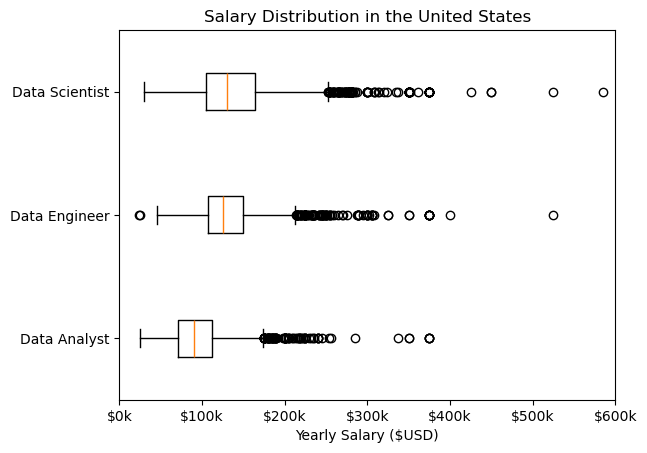

In [11]:
plt.boxplot(salaries_by_job_title, labels= job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()